In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('../data/raw/Churn.csv')
df.shape


(7043, 21)

In [3]:

df.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [4]:
pd.set_option('display.max_columns', None) #Shows ALL rows and ALL columns completely
pd.set_option('display.max_rows', None)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.describe(include='all') # gives you a complete summary of ALL columns - both numbers and text.

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


Binary Encoding

In [6]:
# Binary categorical column (2 unique values)
binary_cols = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn'
]
# Map Yes/No and Male/Female to 0 and 1

df[binary_cols] = df[binary_cols].replace({'Yes': 1, 'No': 0, 'Male': 0, 'Feme': 1})

C:\Users\user\AppData\Local\Temp\ipykernel_6200\1888819798.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_cols] = df[binary_cols].replace({'Yes': 1, 'No': 0, 'Male': 0, 'Feme': 1})


In [8]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,0,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


One hot encoding

In [7]:
# categorical columns with more than 2 unique values
multi_cat_cols = [
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
     'Contract', 'PaymentMethod'
]
df = pd.get_dummies(df, columns=multi_cat_cols, drop_first=True)



In [8]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,Female,0,1,0,1,0,1,29.85,29.85,0,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
1,5575-GNVDE,0,0,0,0,34,1,0,56.95,1889.5,0,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True
2,3668-QPYBK,0,0,0,0,2,1,1,53.85,108.15,1,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
3,7795-CFOCW,0,0,0,0,45,0,0,42.30,1840.75,0,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False
4,9237-HQITU,Female,0,0,0,2,1,1,70.70,151.65,1,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


Cleaning and EDA

In [9]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [10]:
df = df.drop('customerID', axis=1)

In [11]:
bool_cols = df.select_dtypes(include=['bool']).columns
df[bool_cols] = df[bool_cols].astype('int')

In [12]:
df.info() # gives you a concise summary of the DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   object 
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7032 non-null   float64
 9   Churn                                  7043 non-null   int64  
 10  MultipleLines_No phone service         7043 non-null   int64  
 11  Mult

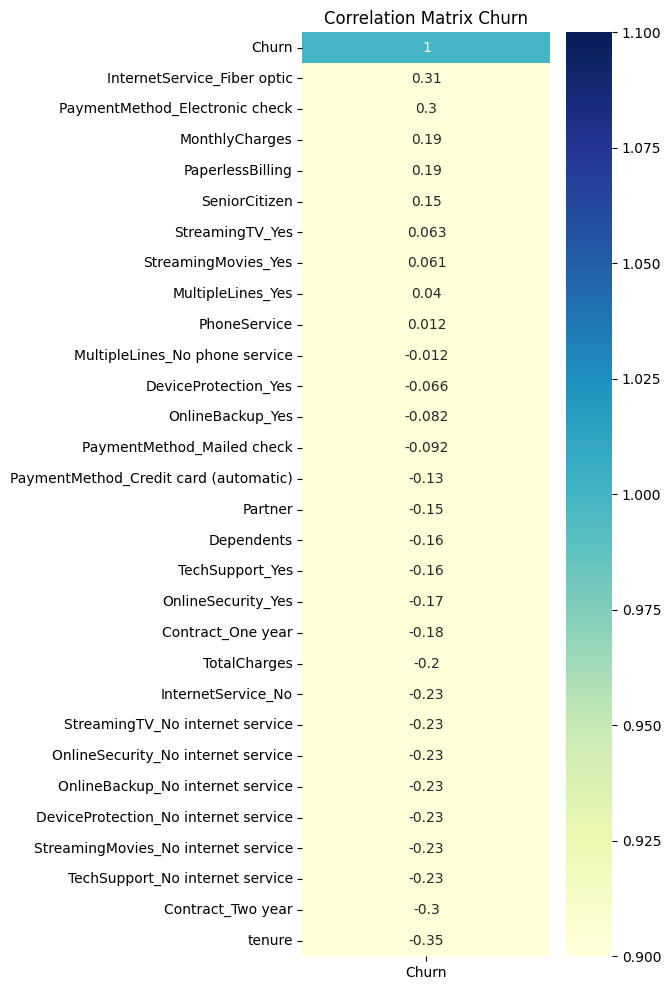

In [13]:
# compute coorelation matrix only for numeric columns

import seaborn as sns

corr_matrix = df.corr(numeric_only=True)

# focus on correlation with Churn column  

churn_corr = corr_matrix[['Churn']].sort_values(by ='Churn', ascending=False)  
 
 # ploting the correlation matrix
plt.figure(figsize=(4,12))
sns.heatmap(churn_corr, annot=True, cmap='YlGnBu', vmin=1, vmax=1)
plt.title('Correlation Matrix Churn')
plt.show()

ML

In [14]:
# check if there is class imbalance
df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.metrics import classification_report
import pandas as pd
import time

# Prepare data
X = df.drop(columns=['Churn'])
y = df['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

THRESHOLD = 0.3  # lower than 0.5 to boost recall (see next to choose the right value)


### RandomForest Classifier

In [20]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import time
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Make sure both train and test have same columns
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Calculate scale_pos_weight for imbalance
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

xgb = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    scale_pos_weight=scale_pos_weight,
    eval_metric='logloss'
)

# Training timer
start_train = time.time()
xgb.fit(X_train, y_train)
train_time = time.time() - start_train
print(f"⏱ Training time: {train_time:.2f} seconds")

# Prediction timer
start_pred = time.time()
proba = xgb.predict_proba(X_test)[:, 1]
y_pred = (proba >= THRESHOLD).astype(int)
pred_time = time.time() - start_pred
print(f"⏱ Prediction time: {pred_time:.4f} seconds")

# Classification report
print(classification_report(y_test, y_pred, digits=3))

⏱ Training time: 0.98 seconds
⏱ Prediction time: 0.0302 seconds
              precision    recall  f1-score   support

           0      0.912     0.683     0.781      1035
           1      0.483     0.818     0.607       374

    accuracy                          0.719      1409
   macro avg      0.697     0.751     0.694      1409
weighted avg      0.798     0.719     0.735      1409



## Hyperparameter Tuning (Optuna) & Experiment Tracking (MLFlow)

In [22]:
import optuna
from xgboost import XGBClassifier
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split

# Objective function for Optuna
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 300, 800),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 5),
        "reg_lambda": trial.suggest_float("reg_lambda", 0, 5),
        "random_state": 42,
        "n_jobs": -1,
        "scale_pos_weight": (y_train == 0).sum() / (y_train == 1).sum(),
        "eval_metric": "logloss"
    }
    
    model = XGBClassifier(**params)
    model.fit(X_train, y_train)
    proba = model.predict_proba(X_test)[:, 1]
    y_pred = (proba >= THRESHOLD).astype(int)  # Keep your tuned threshold
    return recall_score(y_test, y_pred, pos_label=1)  # Optimize recall for churners

# Run Optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

print("Best Params:", study.best_params)
print("Best Recall:", study.best_value)

c:\Users\user\Desktop\ml\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-11-03 15:07:20,567] A new study created in memory with name: no-name-edc9d0f8-0519-4484-ad65-27f49561db83
[I 2025-11-03 15:07:21,171] Trial 0 finished with value: 0.893048128342246 and parameters: {'n_estimators': 420, 'learning_rate': 0.022650782328941917, 'max_depth': 5, 'subsample': 0.7501769157039437, 'colsample_bytree': 0.7908360024918181, 'min_child_weight': 9, 'gamma': 2.2862480211646257, 'reg_alpha': 0.6123643705976817, 'reg_lambda': 1.1677424446190654}. Best is trial 0 with value: 0.893048128342246.
[I 2025-11-03 15:07:21,518] Trial 1 finished with value: 0.8850267379679144 and parameters: {'n_estimators': 525, 'learning_rate': 0.14632401053055363, 'max_depth': 8, 'subsample': 0.8449274509913662, 'colsample_bytree': 0.8

Best Params: {'n_estimators': 774, 'learning_rate': 0.1959133676066859, 'max_depth': 8, 'subsample': 0.9799708856507022, 'colsample_bytree': 0.6695759472939177, 'min_child_weight': 10, 'gamma': 4.732648335834456, 'reg_alpha': 3.5191027166827924, 'reg_lambda': 4.708874214831218}
Best Recall: 0.9171122994652406


In [23]:
import optuna
from xgboost import XGBClassifier
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split

# Objective function for Optuna
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 300, 800),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 5),
        "reg_lambda": trial.suggest_float("reg_lambda", 0, 5),
        "random_state": 42,
        "n_jobs": -1,
        "scale_pos_weight": (y_train == 0).sum() / (y_train == 1).sum(),
        "eval_metric": "logloss"
    }
    
    model = XGBClassifier(**params)
    model.fit(X_train, y_train)
    proba = model.predict_proba(X_test)[:, 1]
    y_pred = (proba >= THRESHOLD).astype(int)  # Keep your tuned threshold
    return recall_score(y_test, y_pred, pos_label=1)  # Optimize recall for churners

# Run Optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

print("Best Params:", study.best_params)
print("Best Recall:", study.best_value)

[I 2025-11-03 15:11:36,789] A new study created in memory with name: no-name-e3a9a3dd-7c51-4c64-9ea6-7a50f8b4fc5f
[I 2025-11-03 15:11:37,663] Trial 0 finished with value: 0.8663101604278075 and parameters: {'n_estimators': 609, 'learning_rate': 0.09426039280920533, 'max_depth': 4, 'subsample': 0.6576117535162185, 'colsample_bytree': 0.5092974517460562, 'min_child_weight': 9, 'gamma': 0.7405416186661562, 'reg_alpha': 2.621224821595154, 'reg_lambda': 2.256816599373011}. Best is trial 0 with value: 0.8663101604278075.
[I 2025-11-03 15:11:38,570] Trial 1 finished with value: 0.8636363636363636 and parameters: {'n_estimators': 727, 'learning_rate': 0.027010050859094394, 'max_depth': 7, 'subsample': 0.9552032769484629, 'colsample_bytree': 0.6850503911359513, 'min_child_weight': 6, 'gamma': 0.43552222222992987, 'reg_alpha': 3.194780194991649, 'reg_lambda': 1.522672283245352}. Best is trial 0 with value: 0.8663101604278075.
[I 2025-11-03 15:11:39,229] Trial 2 finished with value: 0.82085561497

Best Params: {'n_estimators': 333, 'learning_rate': 0.013244447406935228, 'max_depth': 10, 'subsample': 0.999187655594522, 'colsample_bytree': 0.9809222814171258, 'min_child_weight': 10, 'gamma': 4.943469608549699, 'reg_alpha': 1.4468531607514936, 'reg_lambda': 0.17118345495656026}
Best Recall: 0.9251336898395722


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import time
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Calculate scale_pos_weight for imbalance
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

# Add the scale_pos_weight and fixed params to the best ones from Optuna
best_params = study.best_params
best_params.update({
    "random_state": 42,
    "n_jobs": -1,
    "scale_pos_weight": scale_pos_weight,
    "eval_metric": "logloss"
})

# Create model from best params
xgb = XGBClassifier(**best_params)

# Training timer
start_train = time.time()
xgb.fit(X_train, y_train)
train_time = time.time() - start_train
print(f"⏱ Training time: {train_time:.2f} seconds")

# Prediction timer
start_pred = time.time()
proba = xgb.predict_proba(X_test)[:, 1]
y_pred = (proba >= THRESHOLD).astype(int)
pred_time = time.time() - start_pred
print(f"⏱ Prediction time: {pred_time:.4f} seconds")

# Classification report
print(classification_report(y_test, y_pred, digits=3))

⏱ Training time: 0.42 seconds
⏱ Prediction time: 0.0080 seconds
              precision    recall  f1-score   support

           0      0.955     0.572     0.715      1035
           1      0.439     0.925     0.595       374

    accuracy                          0.666      1409
   macro avg      0.697     0.749     0.655      1409
weighted avg      0.818     0.666     0.683      1409



In [ ]:
def preprocess_data(df: pd.DataFrame) -> pd.DataFrame:
    """Preprocess the input DataFrame by handling categorical variables and missing values.

    Args:
        df (pd.DataFrame): Input DataFrame to preprocess.

    Returns:
        pd.DataFrame: Preprocessed DataFrame.
    """
    
    # Handle binary categorical columns
    binary_cols = [col for col in df.columns if df[col].nunique() == 2]
    for col in binary_cols:
        df[col] = df[col].map({"No": 0, "Yes": 1})

        # Handle missing values
        df[col] = df[col].fillna(0)
    
    return df
    # Handle multi-category categorical columns
    multi_cat_cols = [col for col in df.columns if df[col].nunique() > 2 and df[col].dtype == 'object']
    df = pd.get_dummies(df, columns=multi_cat_cols, drop_first=True)

    return df
 
    # Handle numerical columns
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns   
    for col in num_cols:
        df[col] = df[col].fillna(df[col].mean())
    
    return df
    # Alternative: Fill numerical NaNs with 0 or the mean

def split_data(df: pd.DataFrame, test_size: float = 0.2) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """Split the input DataFrame into training and testing sets.

    Args:
        df (pd.DataFrame): Input DataFrame to split.
        test_size (float, optional): Size of the testing set. Defaults to 0.2.

    Returns:
        Tuple[pd.DataFrame, pd.DataFrame]: Training and testing sets.
    """
    
    # Split the data into training and testing sets
    train_df, test_df = train_test_split(df, test_size=test_size, random_state=42)
    
    return train_df, test_df

def train_model(train_df: pd.DataFrame, test_df: pd.DataFrame, model: str) -> Any: 
    """Train the input model on the training set and evaluate its performance on the testing set.

    Args:
        train_df (pd.DataFrame): Training set.
        test_df (pd.DataFrame): Testing set.
        model (str): Model to train.

    Returns:
        Any: Trained model.
    """
    
    # Train the model
    if model == "Logistic Regression":
        model = LogisticRegression()
    elif model == "Decision Tree":
        model = DecisionTreeClassifier()    
    elif model == "Random Forest":
        model = RandomForestClassifier()
    elif model == "Gradient Boosting":
        model = GradientBoostingClassifier()
    
    model.fit(train_df, train_df["target"])
    
        # Evaluate the model